





## import warnings
warnings.filterwarnings("ignore")

Start with loading all necessary libraries
import numpy as np import pandas as pd from os import path from PIL import Image from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt %matplotlib inline

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [2]:
data = pd.read_csv(r"C:\Users\Suresh\Downloads\archive (16)\IndiaWantsOxygen.csv")
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Localwaala,NaN,The one stop portal for Covid19 resources. Get...,2021-05-17 14:18:11,2,0,0,False,2021-08-20 13:12:19,India fights Corona.\n\nhttps://t.co/KdhZb2Nyw...,"['covid', 'share', 'help', 'helpeachother', 'p...",Twitter Web App,False
1,Ka'ab Rana 🇵🇰🇵🇸,"Faisalabad, Pakistan","I'm a student of biology , chemistry and soci...",2017-06-17 13:27:54,40,85,2591,False,2021-08-18 14:04:40,@4Retina @SuhaAlharere We as a nation forced o...,['IndiaNeedsOxygen'],Twitter for Android,False
2,Muhammad Ismail,USA,Visit Muhammad Qasim's Official\nhttps://t.co/...,2020-11-27 08:27:19,309,451,287,False,2021-08-18 09:55:33,@arynewsud Shocking Imran Khan Fail Prediction...,"['IndiaNeedsOxygen', 'IndianLivesMatter', 'jum...",Twitter for Android,False
3,Localwaala,NaN,The one stop portal for Covid19 resources. Get...,2021-05-17 14:18:11,2,0,0,False,2021-08-10 12:38:21,Facts &gt;&gt;&gt; Myth\n\nhttps://t.co/KdhZb2...,"['covid', 'indiafightscovid19', 'indiafightsco...",Twitter Web App,False
4,#FreePalestine ‏‎‎ஏழைகள் அவெஞ்சர்,Bermuda Triangle,"ManUtd fan, PUBG Mobile Semi-Pro, Straight-Edg...",2011-06-17 12:19:24,2062,3438,173250,False,2021-08-10 09:50:29,monkey balancing karke ulta tum bh#rwe log Vic...,['IndiaNeedsOxygen'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28562,Aqib Ali (Punjabi),NaN,A Joker 🃏&\nHumanitarian.🕊️\nPatriot Pakistani...,2019-02-16 08:18:54,27,29,173,False,2021-04-24 00:01:28,Let’s pray for India\nLet’s pray for Humanity....,"['PakistanstandswithIndia', 'Humanity', 'india...",Twitter for Android,False
28563,@Abuzar Malik🇵🇰,"Gujranwala, Pakistan",Alhamdulillah For Everything😇 Hr Pl Bss Unki Y...,2020-11-24 13:35:09,26,169,1011,False,2021-04-24 00:01:27,Get well soon dear neighbour India.\nWe are pr...,"['IndiaNeedsOxygen', 'IndianLivesMatter']",Twitter for iPhone,False
28564,Shobi43,NaN,EX-Apsacian\nNumlian\nlove Holic🔥,2021-03-04 03:55:42,1,14,18,False,2021-04-24 00:01:01,"Put religion, caste and race aside and pray fo...","['PakistanstandswithIndia', 'IndiaNeedsOxygen'...",Twitter for Android,False
28565,rana.exn,"Kamalia, Pakistan",I changed my Facebook Name Ahsan Shabbir and B...,2017-03-11 13:20:53,75,299,347,False,2021-04-24 00:00:44,We are neighbors not enemy`s\nWe are rivals no...,"['IndiaNeedsOxygen', 'PakistanstandswithIndia']",Twitter for Android,False


In [3]:
data=pd.DataFrame(data.text)

data.head()

,text
0,India fights Corona.\n\nhttps://t.co/KdhZb2Nyw...
1,@4Retina @SuhaAlharere We as a nation forced o...
2,@arynewsud Shocking Imran Khan Fail Prediction...
3,Facts &gt;&gt;&gt; Myth\n\nhttps://t.co/KdhZb2...
4,monkey balancing karke ulta tum bh#rwe log Vic...


# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [4]:
data.iloc[991,0]  # [row index , column index ]

'Tweet 1:Hope this helps in saving atleast a life.We need to stay united and win this war against this deadly pandemic.\n#GodMorningTuesday\n#IndiaFightsCorona\n#Indianeedsoxygen https://t.co/IgpokuRTIM'

In [5]:
data.text=data.text.str.lower()

In [6]:
data.iloc[991,0]

'tweet 1:hope this helps in saving atleast a life.we need to stay united and win this war against this deadly pandemic.\n#godmorningtuesday\n#indiafightscorona\n#indianeedsoxygen https://t.co/igpokurtim'

### Remove url¶
* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [7]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[991,0]

C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\1617355479.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)


'tweet 1:hope this helps in saving atleast a life.we need to stay united and win this war against this deadly pandemic.\n#godmorningtuesday\n#indiafightscorona\n#indianeedsoxygen '

### Step 2 :- Punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [10]:
data.iloc[991,0]

'tweet 1:hope this helps in saving atleast a life.we need to stay united and win this war against this deadly pandemic.\n#godmorningtuesday\n#indiafightscorona\n#indianeedsoxygen '

In [11]:
data.text=data.text.apply(lambda x : remove_punctuation(x))  # x = Text 

In [12]:
data.iloc[991,0]

'tweet 1hope this helps in saving atleast a lifewe need to stay united and win this war against this deadly pandemic\ngodmorningtuesday\nindiafightscorona\nindianeedsoxygen '

In [13]:
data.iloc[2,0]

'arynewsud shocking imran khan fail prediction\nimrankhanpti listen to qasim\n♻️ allah wanted to help pakistan  through qasims dreams\nmuhammad qasim dreams\n\nindianeedsoxygen\nindianlivesmatter\njummahmubarak covidindia\nimrankhancancelexams\n '

# Remove Number

In [14]:
data['text'] = data['text'].str.replace('\d+','')  # data.text  or data['text']

C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\2113748263.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+','')  # data.text  or data['text']


In [15]:
data.iloc[57,0]

'i don’t feel like this is getting enough attention indianeedsoxygen '

# Removing Stop Words

In [16]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data.iloc[991,0]

'tweet hope this helps in saving atleast a lifewe need to stay united and win this war against this deadly pandemic\ngodmorningtuesday\nindiafightscorona\nindianeedsoxygen '

In [18]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [19]:
data.iloc[991,0]

'tweet hope helps saving atleast lifewe need stay united win war deadly pandemic godmorningtuesday indiafightscorona indianeedsoxygen'

### Common Words
* manually created as per the case study

In [20]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'slugged',
 'prosopic',
 'agamid',
 'gestureless',
 'inexpressibleness',
 'criticizable',
 'scabrate',
 'palladosammine',
 'uranoscopia',
 'gametal',
 'preaxiad',
 'depuratory',
 'thiodiphenylamine',
 'dramshop',
 'hopefully',
 'interpolatively',
 'greedless',
 'acceptation',
 'fluvicoline',
 'bifluoride',
 'pensionary',
 'profligately',
 'screver',
 'crappie',
 'Myriophyllum',
 'unloved',
 'Alsatian',
 'entoolitic',
 'sporadically',
 'Atrebates',
 'benedictively',
 'pregranite',
 'sporangioid',
 'subsequential',
 'Tasian',
 'tipple',
 'paunched',
 'slubbering',
 'untamedly',
 'orthoplastic',
 'augur',
 'benzophenone',
 'verbile',
 'Temiskaming',
 'gingersnap',
 'Litiopa',
 'prickwood',
 'pachyglossia',
 'polymorphean',
 'helenioid',
 'untranspired',
 'diallagite',
 'radiated',
 'unwitched',
 'misperformance',
 'semicone',
 'fatalistic',
 'unpreparedness',
 'antimasquer',
 'splinty',
 'linear',
 'vriddhi',
 'peculate',
 'irrigation',
 'pathosocial',
 'gallotannin',
 'contemplamen',
 '

In [21]:
text=data.text[991]
text

'tweet hope helps saving atleast lifewe need stay united win war deadly pandemic godmorningtuesday indiafightscorona indianeedsoxygen'

In [22]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('indianeedsoxygen|indian|india|oxygen', '', text) #remove delhipolice
    text =  re.sub('supply|crisis|covidindia|prayers|moodi|modi','', text) #remove farmers
    text =  re.sub('help|covid|horror|hero','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like S or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad 
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you word tokens 
                    if w.lower() in words)  # dictionary     
    return text

round2 = lambda x: clean_text_round2(x)

In [23]:
data.iloc[991,0]

'tweet hope helps saving atleast lifewe need stay united win war deadly pandemic godmorningtuesday indiafightscorona indianeedsoxygen'

In [24]:
data.iloc[79,0]

'foodforthought 💭 “india happens rich people nothing” theatlantic india indianeedoxygen covid indianeedsoxygen wecantbreathe indiafightscovid heartbreaking humanity humanityfirst help humanrights support life indiafightscorona think'

In [25]:
# Let's take a look at the updated text
data = pd.DataFrame(data.text.apply(round2))
data.iloc[991,0]

'tweet hope saving need stay united win war deadly pandemic'

## Stemming¶
import nltk #let's import the libraries from nltk.stem.snowball import SnowballStemmer

the most commonly used stemmer
ss = SnowballStemmer("english") w_tokenizer = nltk.tokenize.WhitespaceTokenizer() lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(text): return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

data.head()

data['text'] = data.text.apply(lambda x :' '.join(SnowballStemmer_text(x))) data.head()

# Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # word tokenizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def lemmatize_text(abc):
    return [lemmatizer.lemmatize(w,"v") ## v = verb   = arrest
            for w in w_tokenizer.tokenize(abc)]  # word tokenizer  w = arresting

In [28]:
data.iloc[991,0]

'tweet hope saving need stay united win war deadly pandemic'

In [29]:
 import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'tweet hope save need stay unite win war deadly pandemic'

In [31]:
data.iloc[991,0]

'tweet hope save need stay unite win war deadly pandemic'

# Strip extra whitespace

In [32]:
data.text = data.text.str.rstrip()
data.iloc[991,0]

'tweet hope save need stay unite win war deadly pandemic'

In [33]:
data.head()

,text
0,corona share people
1,retina nation force emergency make top trend d...
2,shock khan fail prediction listen
3,myth
4,monkey balance tum log par blame jab radicaliz...


In [34]:
data.text[8]

'new specially design therapy treatment asthma lung cancer chronic obstructive pulmonary disease flu concentrator'

###  Finished Data Cleaning

# Term Document Matrix

In [35]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # dtm = Term
data_cv = cv.fit_transform(data.text)  # Term & Count
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # document term matrix

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm

C:\Users\Suresh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,28557,28558,28559,28560,28561,28562,28563,28564,28565,28566
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abattoir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhorrent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zimbabwe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zodiac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,28558,28559,28560,28561,28562,28563,28564,28565,28566,freq
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,485
abattoir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
abhorrent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,28558,28559,28560,28561,28562,28563,28564,28565,28566,freq
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,970
abattoir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
abhorrent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,28558,28559,28560,28561,28562,28563,28564,28565,28566,freq
0,aam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,970
2,abattoir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,abb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,abhorrent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [39]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\218960368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.rename(columns = {'index':'Word'}, inplace = True)
C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\218960368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True)


,Word,freq
4064,people,9192
2730,humanity,8274
5160,situation,5440
4262,pray,5394
1849,emergency,5066
...,...,...
2319,fuse,2
4661,rental,2
2318,furniture,2
4663,repair,2


In [40]:
tdm1.head(10)

,Word,freq
4064,people,9192
2730,humanity,8274
5160,situation,5440
4262,pray,5394
1849,emergency,5066
5709,time,4880
3736,need,4788
1253,country,3320
5093,shortage,2912
4906,save,2822


In [41]:
w = tdm1[tdm1['freq'] > 100]
w

,Word,freq
4064,people,9192
2730,humanity,8274
5160,situation,5440
4262,pray,5394
1849,emergency,5066
...,...,...
5490,super,102
4200,policy,102
3025,internal,102
5568,tackle,102


C:\Users\Suresh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Suresh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


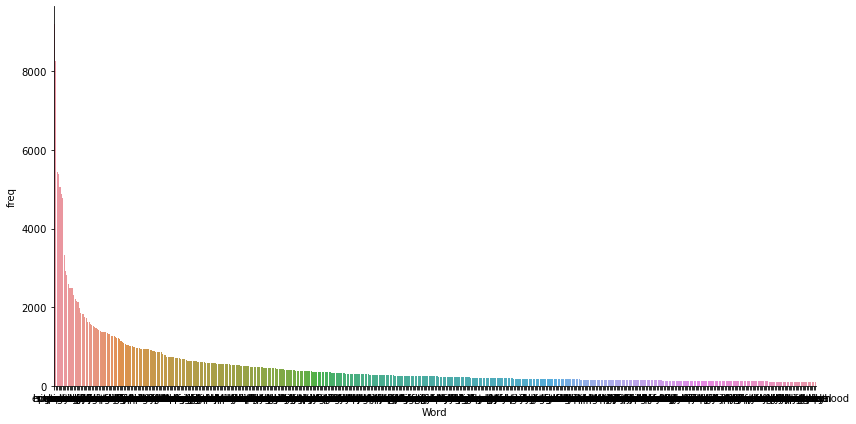

In [42]:
import seaborn as sns
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud 

In [43]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1368585 words in the combination of all review.


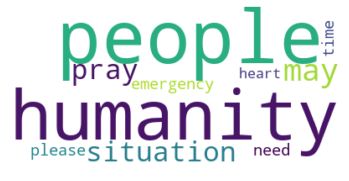

In [44]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=10).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show(
)

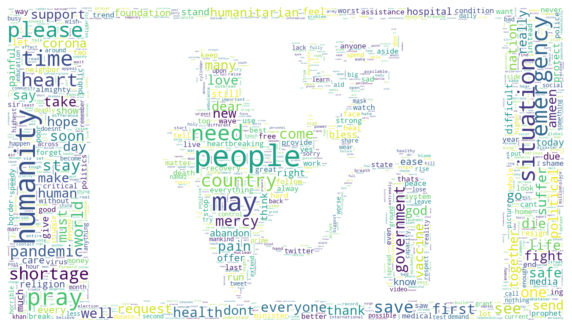

In [62]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open('cd0b9ada-5392-424e-af74-1366c08300fd.jpg'))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

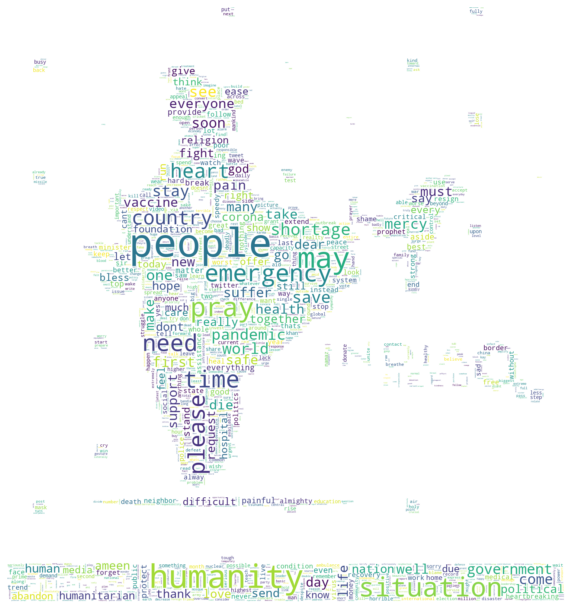

In [60]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open('tree.jpg'))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

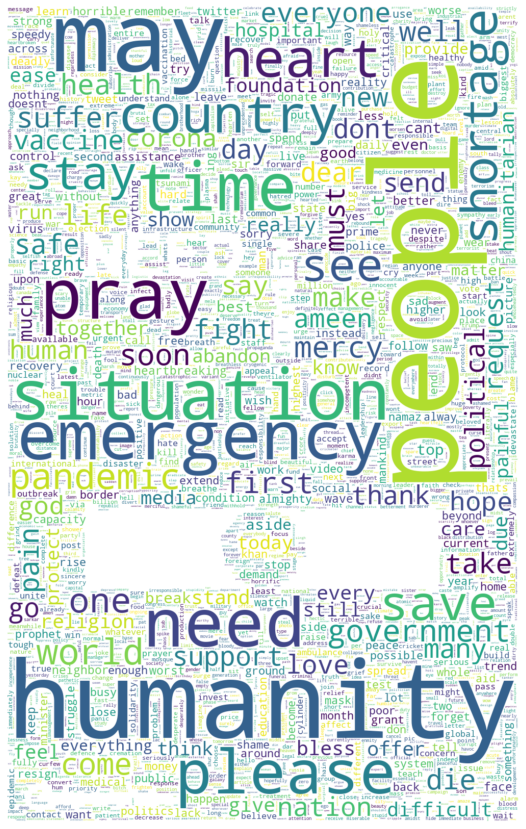

In [59]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("indianeed.jpg"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis 

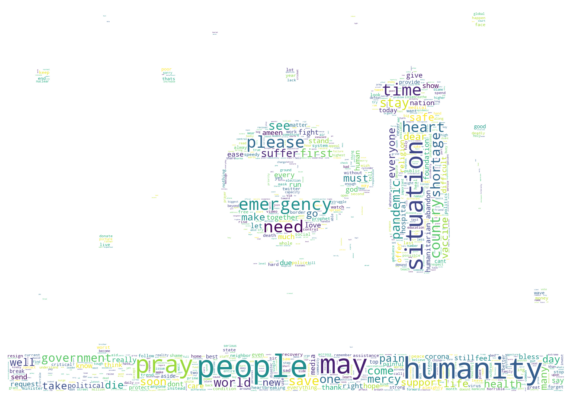

In [58]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("indiaoxygen.jpg"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
data

,text
0,corona share people
1,retina nation force emergency make top trend d...
2,shock khan fail prediction listen
3,myth
4,monkey balance tum log par blame jab radicaliz...
...,...
28562,let pray let pray humanity humanity
28563,get well soon dear pray
28564,put religion caste race aside pray difficult t...
28565,hearts pain


In [49]:
data = data.drop_duplicates('text') 
data

,text
0,corona share people
1,retina nation force emergency make top trend d...
2,shock khan fail prediction listen
3,myth
4,monkey balance tum log par blame jab radicaliz...
...,...
28557,let forget people suffer badly pandemic affect...
28558,humanity first get well soon humanity
28559,political aside pray hard situation imagine si...
28560,even fraction defence health education instead...


In [50]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)

data.head(5)

C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\464033541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['text'].apply(pol)


,text,polarity
0,corona share people,0.00
1,retina nation force emergency make top trend d...,0.50
2,shock khan fail prediction listen,-0.50
3,myth,0.00
4,monkey balance tum log par blame jab radicaliz...,-0.05


In [51]:
data['Sentiment'] = np.where(data['polarity'] >= 0, 'Positive', 'Negative')
data.head()

C:\Users\Suresh\AppData\Local\Temp\ipykernel_47304\3078920830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = np.where(data['polarity'] >= 0, 'Positive', 'Negative')


,text,polarity,Sentiment
0,corona share people,0.00,Positive
1,retina nation force emergency make top trend d...,0.50,Positive
2,shock khan fail prediction listen,-0.50,Negative
3,myth,0.00,Positive
4,monkey balance tum log par blame jab radicaliz...,-0.05,Negative


<AxesSubplot:>

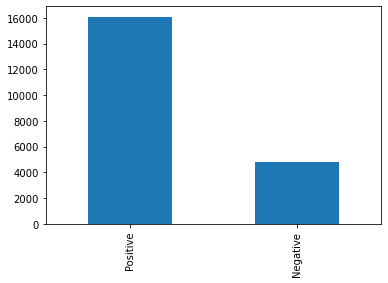

In [52]:
data.Sentiment.value_counts().plot.bar()

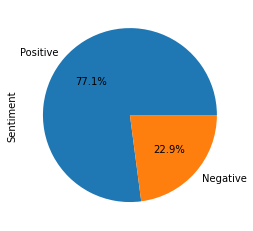

In [53]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

# Finish

# TF-IDF

# from sklearn.feature_extraction.text import TfidfVectorizer

* settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word')

* just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.text) feature_names = cv.get_feature_names() ## EVERY WORD NAME abc=tfidf_vectorizer_vectors.transpose()

* output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names) output.reset_index(inplace=True) output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING output

* output['TFIDF'] = output.max(axis=1) output=output[["Word","TFIDF"]] #SUBSET OF 2 COLUMNS output.sort_values(by='TF*IDF',ascending=False,inplace=True) # SORTING DATA output.head(20)